<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_6_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab 6
Ojasa Chitre

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import plotly.io as pio
pio.renderers.default = "colab"
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

1. Create time series data.

· Replication requirements: What you’ll need to reproduce the analysis

· Creating time series objects: Convert your data to a time series object for time series analysis.

In [7]:
stockData = pd.read_csv('/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab6/Stock/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
stockData.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


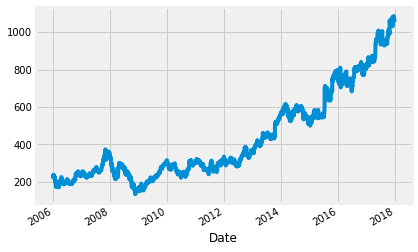

In [8]:
stockData['High'].plot()

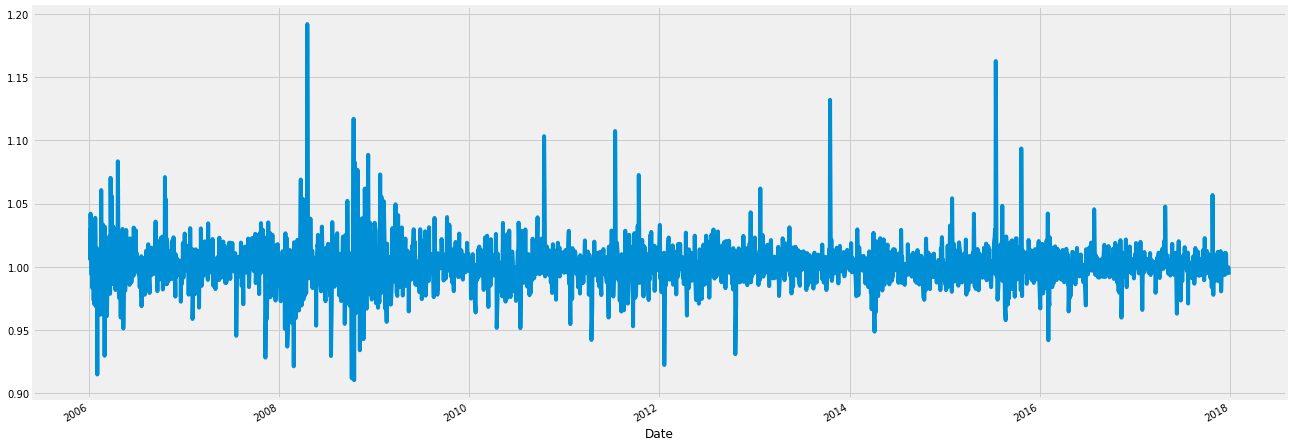

In [9]:
stockData['Change'] = stockData.High.div(stockData.High.shift())
stockData['Change'].plot(figsize=(20,8))

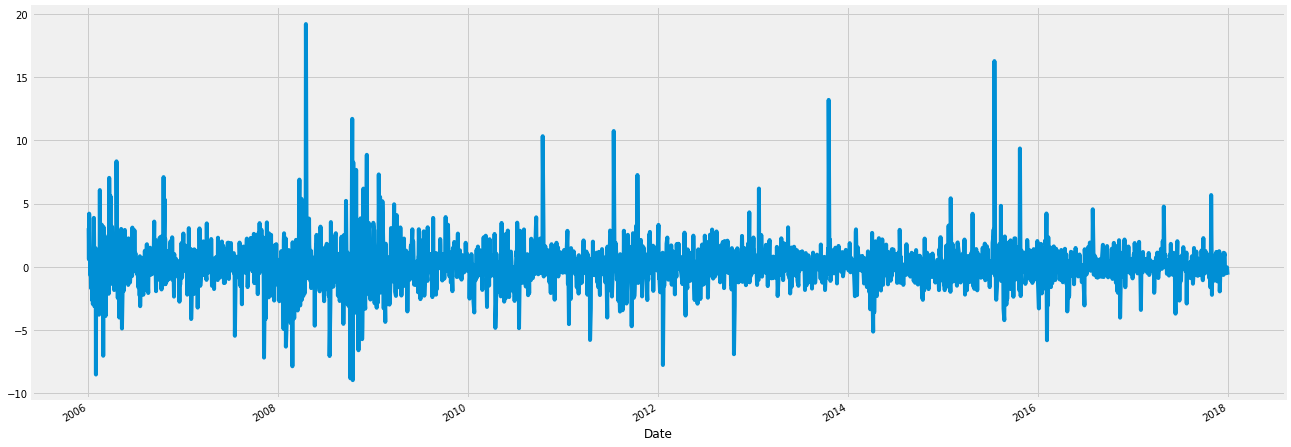

In [10]:
stockData['Return'] = stockData.Change.sub(1).mul(100)
stockData['Return'].plot(figsize=(20,8))

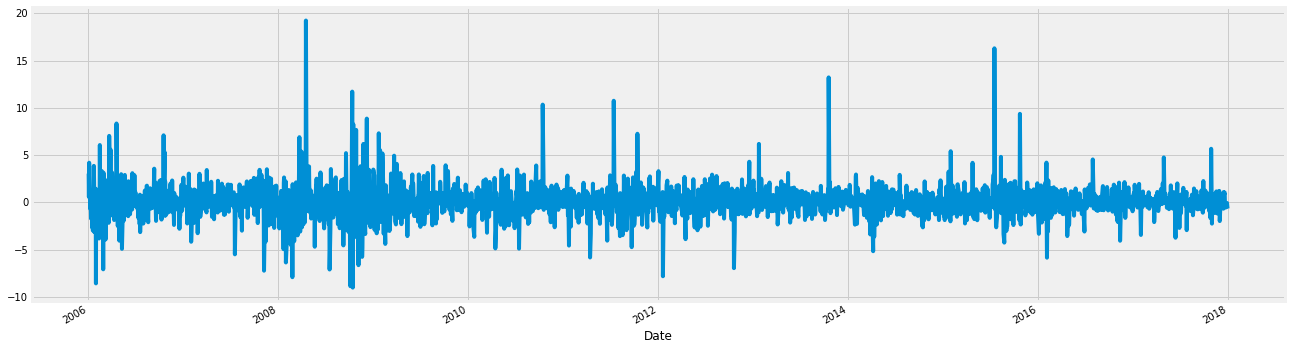

In [11]:
stockData.High.pct_change().mul(100).plot(figsize=(20,6))

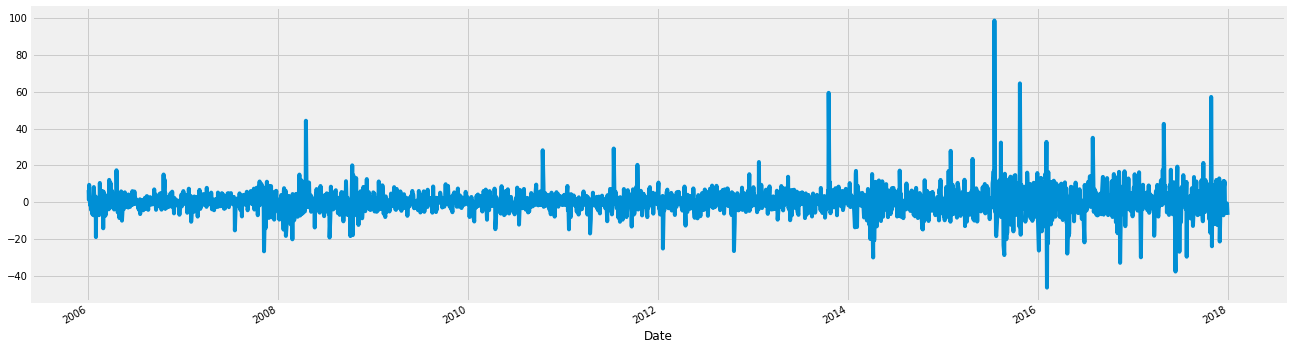

In [12]:
stockData.High.diff().plot(figsize=(20,6))

In [13]:
stockData1 = pd.read_csv('/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab6/Stock/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

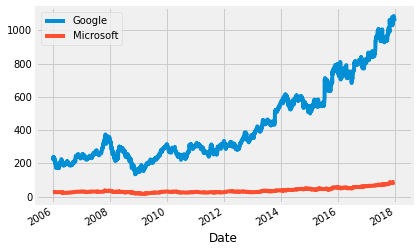

In [14]:
stockData.High.plot()
stockData1.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

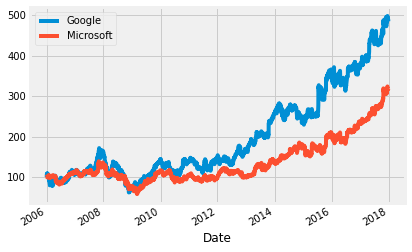

In [15]:
normalized_stockData = stockData.High.div(stockData.High.iloc[0]).mul(100)
normalized_stockData1 = stockData1.High.div(stockData1.High.iloc[0]).mul(100)
normalized_stockData.plot()
normalized_stockData1.plot()
plt.legend(['Google','Microsoft'])
plt.show()

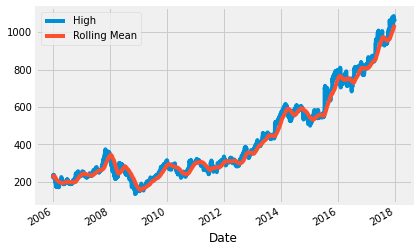

In [16]:
rolling_stockData = stockData.High.rolling('90D').mean()
stockData.High.plot()
rolling_stockData.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

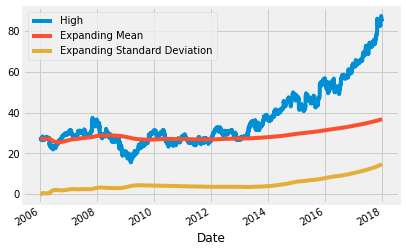

In [17]:
stockData1_mean = stockData1.High.expanding().mean()
stockData1_std = stockData1.High.expanding().std()
stockData1.High.plot()
stockData1_mean.plot()
stockData1_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

2. Accommodate trend, as well as seasonal and event-related variation, in time series models.

· Time series plots: Basic visualization of ts objects and differentiating trends, seasonality, and cycle variation.

· Seasonal plots: Plotting seasonality trends in time series data.

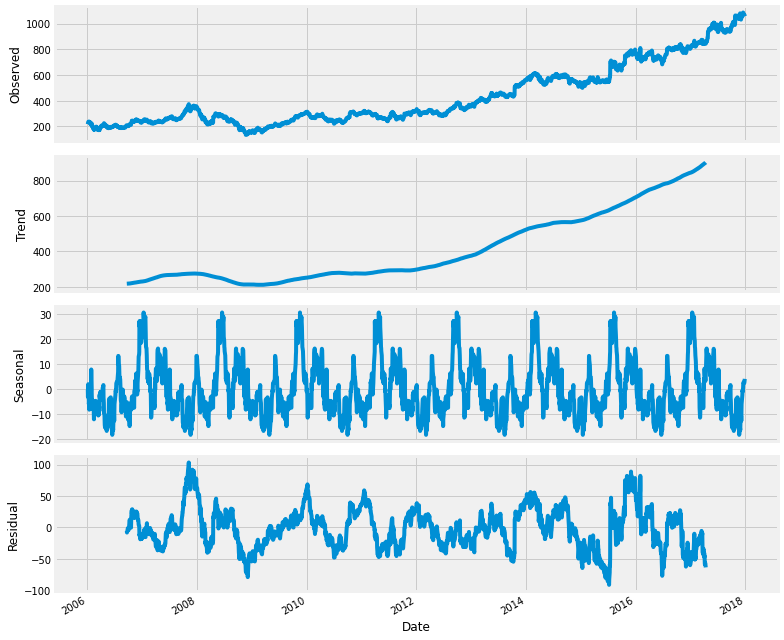

In [18]:
rcParams['figure.figsize'] = 11, 9
decomposed_stockData_volume = sm.tsa.seasonal_decompose(stockData["High"],freq=360) 
figure = decomposed_stockData_volume.plot()
plt.show()

4. White noise: Differentiating signal from the noise.

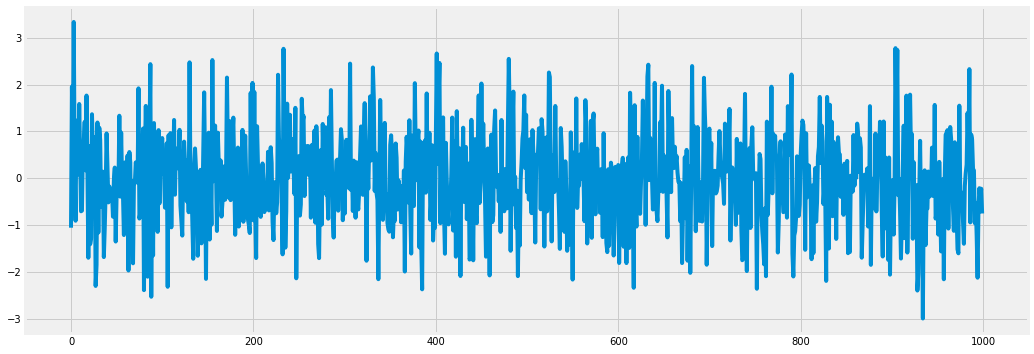

In [19]:
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
plt.plot(white_noise)

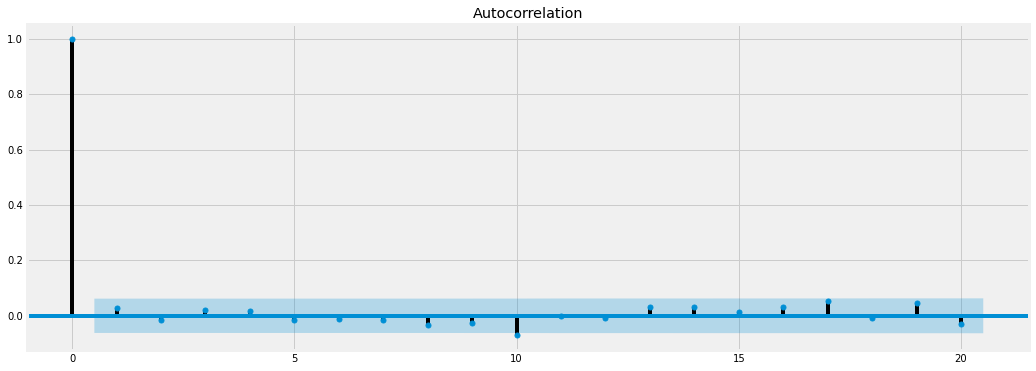

In [20]:
plot_acf(white_noise,lags=20)
plt.show()

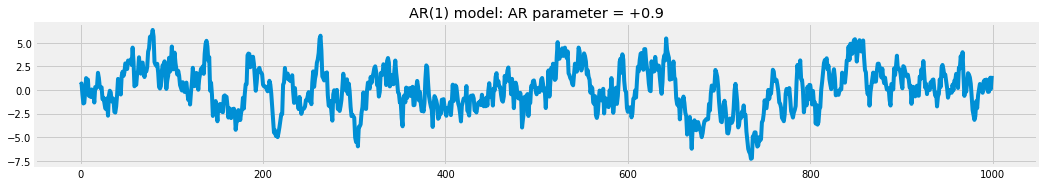

In [25]:
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) 
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

In [26]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1436.800
Method:                       css-mle   S.D. of innovations              1.017
Date:                Tue, 19 Apr 2022   AIC                           2879.600
Time:                        15:58:02   BIC                           2894.324
Sample:                             0   HQIC                          2885.196
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0893      0.299      0.298      0.766      -0.498       0.676
ar.L1.y        0.8935      0.014     63.370      0.000       0.866       0.921
                                    Roots           

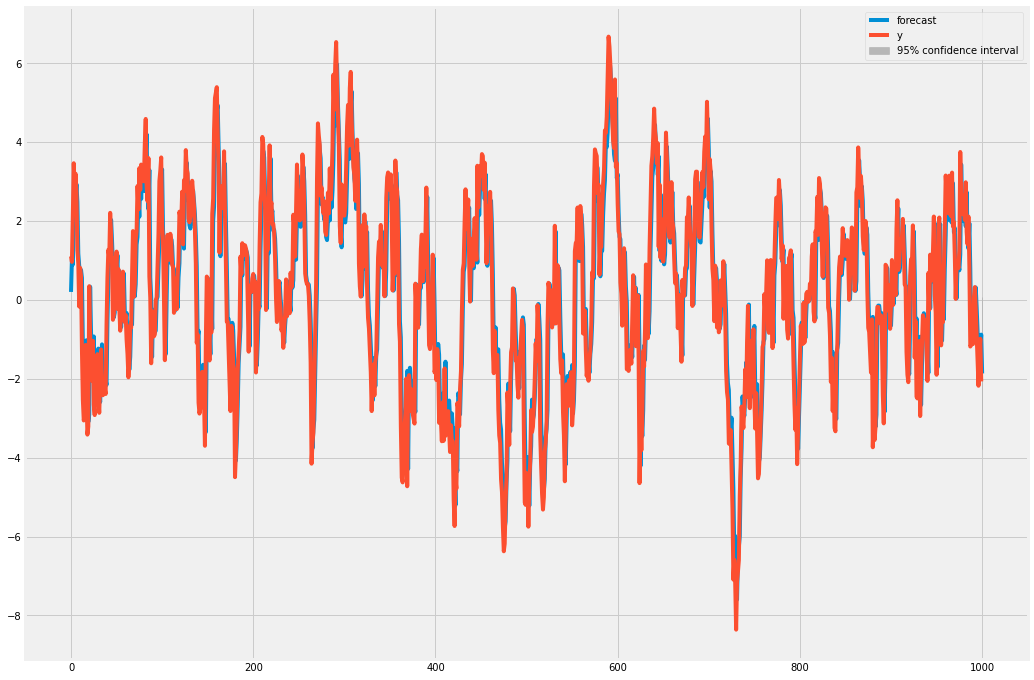

In [23]:
result.plot_predict(start=0, end=1000)
plt.show()

In [24]:
rmse = math.sqrt(mean_squared_error(sim1[0:1000], result.predict(start=0,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.9839809901774368.


##Conclusion:
I was able to understand trends in time series. I was able to apply ARMA model on the time series data.